<a href="https://colab.research.google.com/github/deenadhayalan7/EV_Market_Analysis/blob/main/EVmarketanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("lifestyle.csv")
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [5]:
age_data = df[['Age']].dropna()

In [6]:
print("Descriptive Statistics:")
print(age_data.describe())

Descriptive Statistics:
                Age
count  20000.000000
mean      41.031450
std       13.578725
min       18.000000
25%       29.000000
50%       41.000000
75%       53.000000
max       64.000000


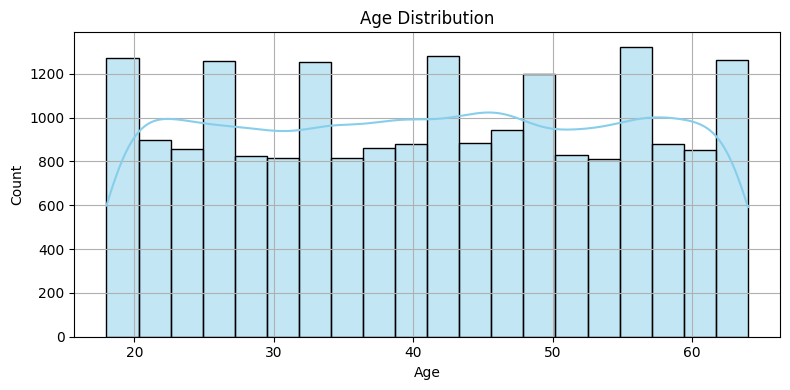

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(age_data['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

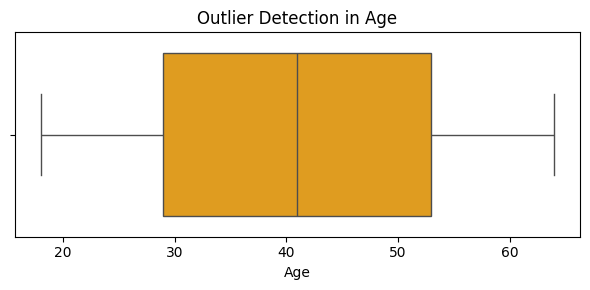

In [8]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=age_data['Age'], color='orange')
plt.title("Outlier Detection in Age")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

In [9]:
scaler = StandardScaler()
age_scaled = scaler.fit_transform(age_data)

In [10]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(age_scaled)
    inertia.append(kmeans.inertia_)

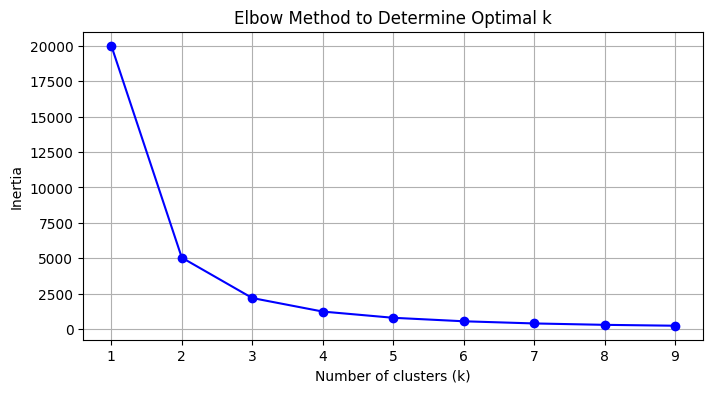

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

In [12]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
age_data['Cluster'] = kmeans.fit_predict(age_scaled)

In [13]:
df['Age_Cluster'] = age_data['Cluster']

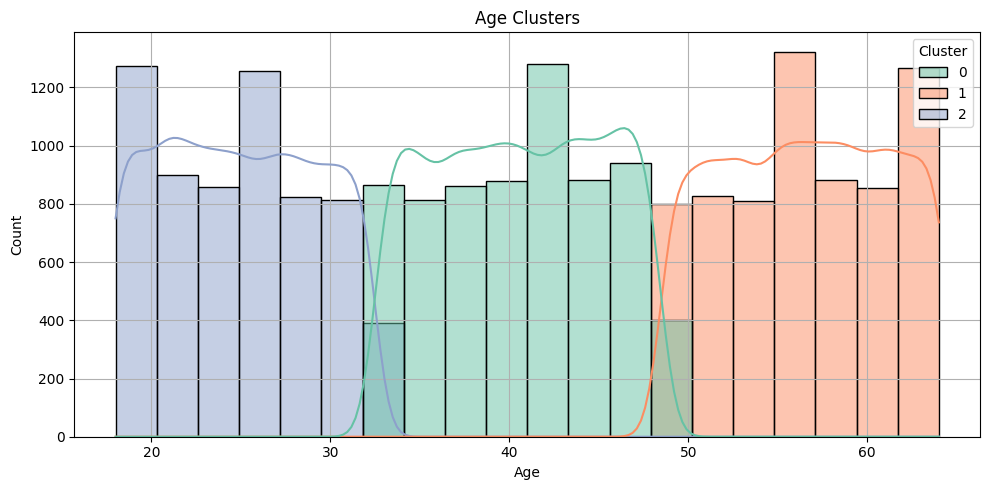

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(data=age_data, x='Age', hue='Cluster', bins=20, palette='Set2', kde=True)
plt.title('Age Clusters')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, center in enumerate(centroids):
    print(f"Cluster {i} - Approx Age Center: {center[0]:.2f} years")

Cluster 0 - Approx Age Center: 40.58 years
Cluster 1 - Approx Age Center: 56.58 years
Cluster 2 - Approx Age Center: 24.88 years


In [16]:
summary = df.groupby('Age_Cluster')['Age'].agg(['count', 'mean', 'min', 'max'])
print("\nCluster Summary:")
print(summary)


Cluster Summary:
             count       mean  min  max
Age_Cluster                            
0             6924  40.579578   33   48
1             6761  56.578613   49   64
2             6315  24.881710   18   32


In [17]:
bins = [17, 30, 50, 100]
labels = ['Young Adults', 'Middle-aged', 'Seniors']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

<ipython-input-18-97b4c121fc63>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Group', palette='pastel')


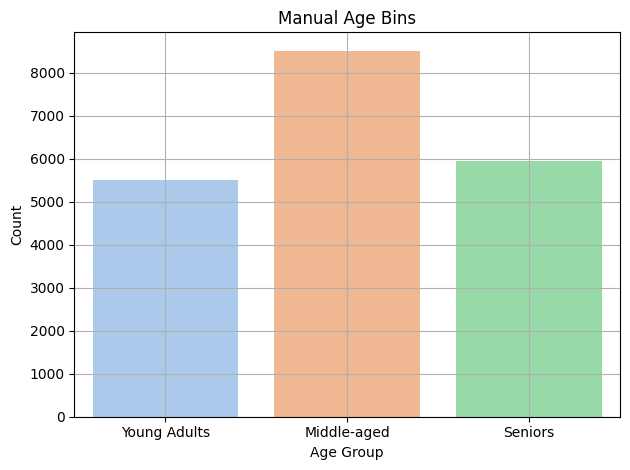

In [18]:
sns.countplot(data=df, x='Age_Group', palette='pastel')
plt.title("Manual Age Bins")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-19-6a0e259b79b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_data, x='Cluster', y='Age', palette='Set2')


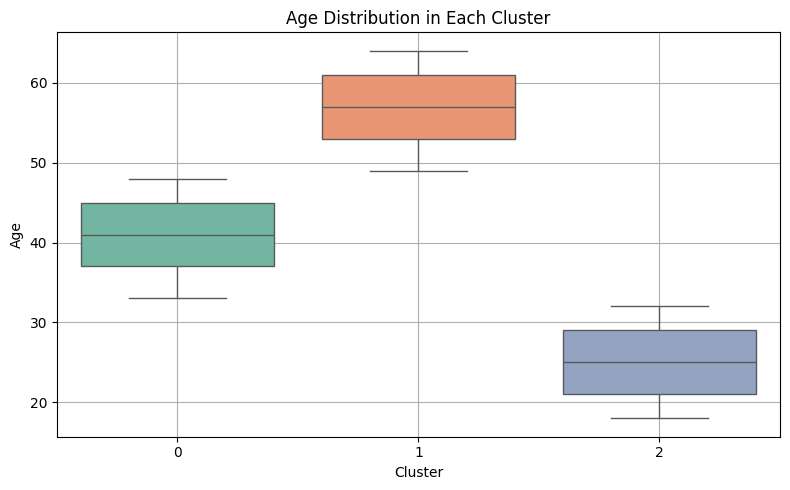

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=age_data, x='Cluster', y='Age', palette='Set2')
plt.title('Age Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-20-70485fa89d09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=age_data, x='Cluster', y='Age', palette='Set3')


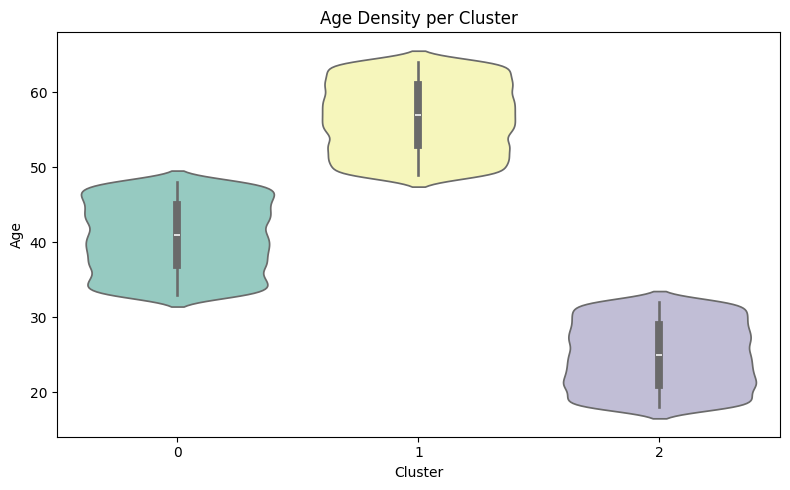

In [20]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=age_data, x='Cluster', y='Age', palette='Set3')
plt.title('Age Density per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


<ipython-input-21-6a894d051df6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=age_data, palette='Blues')


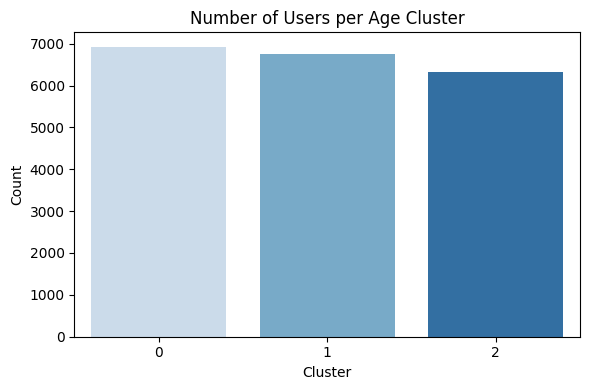

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=age_data, palette='Blues')
plt.title("Number of Users per Age Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


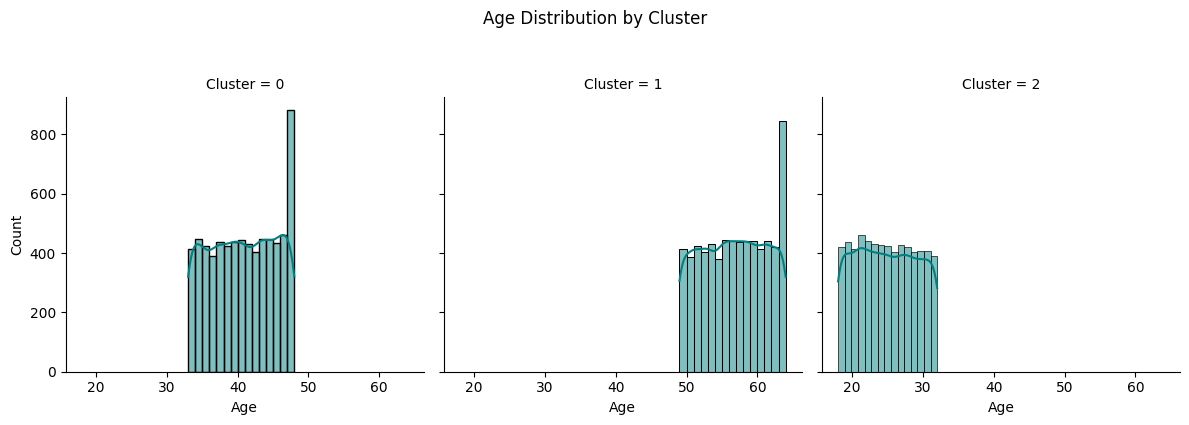

In [22]:
g = sns.FacetGrid(age_data, col="Cluster", height=4, aspect=1)
g.map(sns.histplot, "Age", bins=15, kde=True, color="teal")
g.fig.suptitle("Age Distribution by Cluster", y=1.05)
plt.tight_layout()
plt.show()


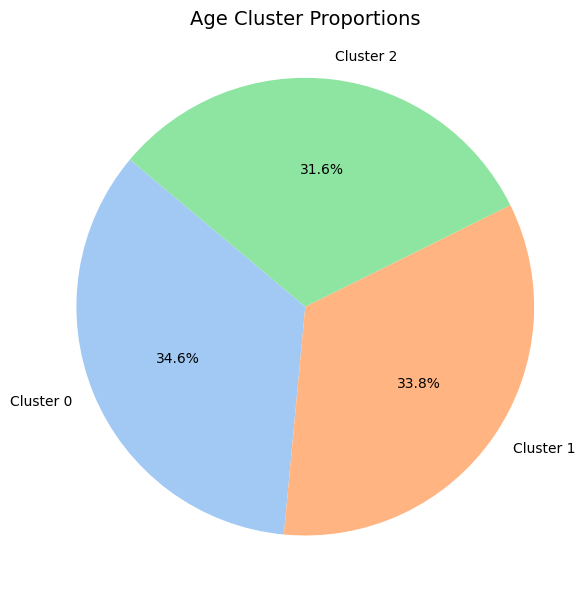

In [23]:
cluster_counts = age_data['Cluster'].value_counts().sort_index()
labels = [f'Cluster {i}' for i in cluster_counts.index]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Age Cluster Proportions", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.tight_layout()
plt.show()